In [1]:
import pandas as pd
import requests,json

In [2]:
days = [[i for i in range(1,32)],[i for i in range(1,29)],[i for i in range(1,32)],
       [i for i in range(1,31)],[i for i in range(1,32)],[i for i in range(1,31)],
       [i for i in range(1,32)],[i for i in range(1,32)],[i for i in range(1,31)],
       [i for i in range(1,32)],[i for i in range(1,31)],[i for i in range(1,32)]]

In [3]:
data_dict = dict()
day_no = 1
for month in range(1,13):
    for day in days[month-1]:
        date = "2019-{}-{}".format(month,day)
        url = "https://api.sunrise-sunset.org/json?lat=12.9716&lng=77.5946&date={}".format(date)
        time = requests.get(url).json()['results']['day_length']
        a = int(time.split(':')[0])
        b = int(time.split(':')[1])
        c = int(time.split(':')[2])
        time = a*3600 + b*60 + c
        data_dict[day_no] = time
        day_no = day_no + 1

In [4]:
df_data = pd.DataFrame(list(data_dict.items()),columns = ['Day','Length_of_day'])
print(df_data.shape)
df_data.head()

(365, 2)


,Day,Length_of_day
0,1,40969
1,2,40980
2,3,40992
3,4,41005
4,5,41019


In [5]:
df_data.to_csv("data_length_of_day.csv")

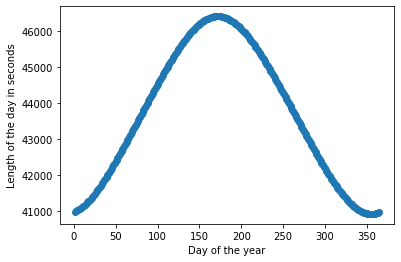

In [9]:
from matplotlib import pyplot as plt
plt.scatter(df_data["Day"],df_data["Length_of_day"])
plt.xlabel("Day of the year")
plt.ylabel("Length of the day in seconds")
plt.show()

In [10]:
max(df_data["Length_of_day"].tolist())

46407